# Price analysis, Profitability and Affordability of Taxi trips in New York City

## Motivation
- Modern taxi companies like Uber and Lyft have made the Taxi trip prices as a blackbox. No one other than the company know how the price is determined. It is important for passengers to know how much more the companies charge the passengers and make them aware of the factors that determine the price.
- Understanding the factors affecting the price brings more transparency and forces companies and consumers to make the best judgement as to what would be a fair price so that all the involved stackholders (Drivers, Riders and Companies) can sustain according to their best interest.
- Even though Uber provides some sort of per minute and per mile rates in their fare breakdown, the rates are variable according to time and location. Predictable pricing allows consumers to plan and adopt the taxi services more.

## Problem Statement
- The goal of this project is to do Exploratory Data Analysis (EDA) on the taxi trip dataset provided by the New York City's Taxi and Limousine Commision (TLC) and try to understand the patterns in each scenario and come to some well defined conclusions.
- These findings will help in coming up with the right Machine Learning model that tries to fit in the dataset.
- This ML Model can later be used to build a tool to show up the price estimate along with estimated share for each stackholder, given a pickup and dropoff location.

## Research Questions
1. Is the current form of pricing model adopted by Taxi companies benefit the consumers?
2. If a different model is to be adopted, what could be the possibilites which benefit all the stackholders like Drivers, Passengers and the Platform companies like Uber, Lyft?
3. Is there any way for the Taxi companies to remove the inefficiencies in the current business and pricing models and end up in profits? (For context: Uber and Lyft are still net loss making)

## Questions this project aims to answer
1. Understand the factors effecting price and how the price changes when we vary the factors
2. Analyse how expensive or inexpensive the taxi trips are, from the passenger point of view
3. Analyse how much profit/income the drivers get from each trip by deducting the expenses incurred
4. Analyse the profitability of the taxi companies like Uber, Lyft and why they are still in losses

## Why this is a significant problem?
- Uber and Lyft are dominating the taxi industry more than the traditional taxi companies.
    - These tech companies provide easy to use interface and on demand taxi service conveniently through app.
    - It's important to bring in some sort of transparency in the pricing models adopted by these tech companies.
    - This should make everyone aware of the factors determining the price and how it effects. And people can make the best judgement that suits them.
- This project findings will encourage further analysis in future and have the much needed conversations about pricing and business models take place.
- We can also gather insights about how the pricing algorithms changed over time by analysing historical trip data (not part of this project but possible future analysis)

## Data Sources
- The source of the data is from the New York City's Taxi & Limousine Commission (TLC) website - https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- TLC regularly updates their website with monthly datasets of all the taxi trips in NYC. Uber, Lyft, Yellow and Green taxis are part of this dataset.
- The website has historical trip data as well from 2013 to the current year 2022 separated on month to month basis.
- For the sake of simplicity and for starting the project, June 2022 data is being analysed for this project (in future phases, past data or other taxi companies trip data may be analysed).

## About this Notebook
- Throughout this notebook, you will find data cleaning and processing steps documented and explained properly.
- Similarly, you can find the corresponding EDA done and the results are documented near the cells.
- Conclusions and References are provided at the end.
- A report is provided along with this notebook which contains the information and results borrowed from this notebook in a brief format.

## Exploratory Data Analysis on Taxi Trip Data
(June 2022 Data, For Hire High Volume Vehicles only. Ex: Uber, Lyft)

Import numpy, pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

Source of dataset [https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [3]:
# trip data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-06.parquet

--2022-10-13 12:02:25--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-06.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21dd:5600:b:20a5:b140:21, 2600:9000:21dd:c800:b:20a5:b140:21, 2600:9000:21dd:a600:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21dd:5600:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458193119 (437M) [application/x-www-form-urlencoded]
Saving to: 'fhvhv_tripdata_2022-06.parquet.3'

fhvhv_tripdata_2022 100%[===================>] 436.97M  11.4MB/s    in 54s     

2022-10-13 12:03:20 (8.10 MB/s) - 'fhvhv_tripdata_2022-06.parquet.3' saved [458193119/458193119]



In [4]:
# zone data
!wget https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

--2022-10-13 12:03:20--  https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21dd:5600:b:20a5:b140:21, 2600:9000:21dd:c800:b:20a5:b140:21, 2600:9000:21dd:a600:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21dd:5600:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12322 (12K) [text/csv]
Saving to: 'taxi+_zone_lookup.csv.3'

taxi+_zone_lookup.c 100%[===================>]  12.03K  --.-KB/s    in 0s      

2022-10-13 12:03:20 (60.9 MB/s) - 'taxi+_zone_lookup.csv.3' saved [12322/12322]



Do
1. pip install pyarrow
2. pip install fastparquet

For reading parquet files

Read trip data for June 2022

In [5]:
df = pd.read_parquet('fhvhv_tripdata_2022-06.parquet')

In [6]:
df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2022-06-01 00:15:35,2022-06-01 00:17:20,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,...,0.68,2.75,0.0,1.00,9.36,N,N,,N,N
1,HV0003,B03404,B03404,2022-06-01 00:39:04,2022-06-01 00:40:36,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,...,1.81,2.75,0.0,4.82,15.61,N,N,,N,N
2,HV0003,B03404,B03404,2022-06-01 00:27:53,2022-06-01 00:31:34,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,...,1.09,2.75,0.0,1.00,8.22,N,N,,N,N
3,HV0003,B03404,B03404,2022-06-01 00:48:15,2022-06-01 00:49:38,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,...,2.19,2.75,0.0,0.00,16.88,N,N,,N,N
4,HV0005,B03406,None,2022-06-01 00:04:51,NaT,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,...,0.73,2.75,0.0,0.00,5.47,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,HV0003,B03404,B03404,2022-06-30 23:20:49,2022-06-30 23:24:23,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,...,1.56,2.75,0.0,2.24,16.23,N,N,,N,N
17780071,HV0003,B03404,B03404,2022-06-30 23:36:13,2022-06-30 23:39:12,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,...,1.59,2.75,0.0,0.00,13.94,N,N,,N,N
17780072,HV0003,B03404,B03404,2022-06-30 23:50:50,2022-06-30 23:55:11,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,...,1.06,2.75,0.0,3.00,18.46,N,N,,N,N
17780073,HV0003,B03404,B03404,2022-06-30 23:02:40,2022-06-30 23:04:58,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,...,2.79,2.75,0.0,1.00,27.27,N,N,,N,N


Read zone data

In [7]:
zone_df = pd.read_csv('taxi+_zone_lookup.csv')

In [8]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Statistics for each column of trip data

In [9]:
df.describe()

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07
mean,1.390083e+02,1.429608e+02,5.169061e+00,1.216133e+03,2.507782e+01,1.194475e+00,7.946835e-01,2.124014e+00,1.160395e+00,2.122203e-01,1.164189e+00,1.992252e+01
std,7.492537e+01,7.802175e+01,6.058429e+00,8.924502e+02,2.111751e+01,3.975068e+00,7.077042e-01,1.757838e+00,1.366686e+00,7.030242e-01,3.247914e+00,1.629283e+01
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.055700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+02
25%,7.500000e+01,7.600000e+01,1.660000e+00,6.180000e+02,1.191000e+01,0.000000e+00,3.600000e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.570000e+00
50%,1.400000e+02,1.420000e+02,3.119000e+00,9.840000e+02,1.922000e+01,0.000000e+00,5.800000e-01,1.640000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.536000e+01
75%,2.110000e+02,2.200000e+02,6.420000e+00,1.544000e+03,3.084000e+01,0.000000e+00,9.700000e-01,2.670000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.477000e+01
max,2.650000e+02,2.650000e+02,6.259600e+02,4.230900e+04,2.409230e+03,2.262000e+02,7.291000e+01,2.156800e+02,1.100000e+01,6.900000e+00,1.500000e+02,9.933100e+02


Column description for this data - [https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf)

### Data Cleaning/Processing - 1
- Remove unnecessary columns not relevant to our problem statement

In [10]:
df.drop(columns=['dispatching_base_num',
                 'originating_base_num',
                 'on_scene_datetime',
                 'tolls',
                 'bcf',
                 'sales_tax',
                 'congestion_surcharge',
                 'airport_fee',
                 'shared_request_flag',
                 'shared_match_flag',
                 'access_a_ride_flag',
                 'wav_request_flag',
                 'wav_match_flag'],
        inplace=True)

In [11]:
df

,hvfhs_license_num,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,HV0003,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36
1,HV0003,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61
2,HV0003,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22
3,HV0003,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88
4,HV0005,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,HV0003,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23
17780071,HV0003,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94
17780072,HV0003,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46
17780073,HV0003,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27


### Data Cleaning/Processing - 2
- Drop NA values

In [12]:
df.dropna(inplace=True)

### Data Cleaning/Processing - 3
- Rename Columns and map the taxi company code to taxi name like Uber, Lyft

Actual codes
- HV0002: Juno
- HV0003: Uber
- HV0004: Via
- HV0005: Lyft

In [13]:
df.rename(columns={
    'hvfhs_license_num': 'taxi_company',
    'PULocationID': 'PULocation',
    'DOLocationID': 'DOLocation'
}, inplace=True)

In [14]:
def license_company_map(lic):
    if lic == 'HV0003':
        return 'Uber'
    elif lic == 'HV0005':
        return 'Lyft'
    return lic

In [15]:
df['taxi_company'] = df['taxi_company'].map(license_company_map)

### Data Cleaning/Processing - 4
- Now there are some unknown locations in Pickup and Dropoff which we know by analysing Zone dataframe
- Remove the rows containing unknown locations in "df"

In [16]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [17]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27


In [18]:
def unknown_locations(id):
    if id == 264 or id == 265:
        return True
    return False

In [19]:
df[
    df.PULocation.map(unknown_locations)
].index

Int64Index([   13254,    64649,    70100,    75130,    86298,    99255,
              106944,   129350,   147399,   183654,
            ...
            17479230, 17500961, 17516820, 17545267, 17573284, 17618911,
            17700506, 17772055, 17773057, 17776276],
           dtype='int64', length=900)

In [20]:
df.drop(df[
    df.PULocation.map(unknown_locations)
].index, inplace=True)

In [21]:
df[
    df.DOLocation.map(unknown_locations)
].index

Int64Index([      23,       26,       44,       68,       80,      138,
                 150,      168,      192,      240,
            ...
            17779915, 17779930, 17779977, 17779986, 17779990, 17779999,
            17780016, 17780024, 17780036, 17780049],
           dtype='int64', length=767811)

In [22]:
df.drop(df[
    df.DOLocation.map(unknown_locations)
].index, inplace=True)

### Data Cleaning/Processing - 5
- There are some trips either having 0 miles as trip_miles or 0 seconds as time_time
- Remove those trips

In [23]:
def zero_trip(trip_ms):
    if trip_ms == 0:
        return True
    return False

In [24]:
df.drop(df[
    df.trip_miles.map(zero_trip)
].index, inplace=True)

In [25]:
df.drop(df[
    df.trip_time.map(zero_trip)
].index, inplace=True)

In [26]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27


In [27]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


### Data Cleaning/Processing - 6
- Expand the pickup and dropoff column to contain location names instead of location code
- This is used in later phases to lookup addresses and estimate distance

In [28]:
zone_df['LocationName'] = zone_df['Zone'] + ", " + zone_df['Borough']

In [29]:
zone_df

,LocationID,Borough,Zone,service_zone,LocationName
0,1,EWR,Newark Airport,EWR,"Newark Airport, EWR"
1,2,Queens,Jamaica Bay,Boro Zone,"Jamaica Bay, Queens"
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,"Allerton/Pelham Gardens, Bronx"
3,4,Manhattan,Alphabet City,Yellow Zone,"Alphabet City, Manhattan"
4,5,Staten Island,Arden Heights,Boro Zone,"Arden Heights, Staten Island"
...,...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone,"World Trade Center, Manhattan"
261,262,Manhattan,Yorkville East,Yellow Zone,"Yorkville East, Manhattan"
262,263,Manhattan,Yorkville West,Yellow Zone,"Yorkville West, Manhattan"
263,264,Unknown,NV,NaN,"NV, Unknown"


In [30]:
zone_df.set_index('LocationID', inplace=True)

In [31]:
id_location_map = zone_df['LocationName'].T.to_dict()

In [32]:
df['PULocation'] = df['PULocation'].map(id_location_map)

In [33]:
df['DOLocation'] = df['DOLocation'].map(id_location_map)

In [34]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,"Union Sq, Manhattan","Greenwich Village South, Manhattan",1.500,480,7.68,1.00,9.36
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,"Midtown Center, Manhattan","Manhattan Valley, Manhattan",4.180,835,20.40,4.82,15.61
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,"TriBeCa/Civic Center, Manhattan","Financial District North, Manhattan",2.910,549,12.29,1.00,8.22
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,"Financial District North, Manhattan","Stuyvesant Heights, Brooklyn",5.450,1197,24.70,0.00,16.88
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,"Kips Bay, Manhattan","Midtown East, Manhattan",1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,"East Harlem North, Manhattan","Stuy Town/Peter Cooper Village, Manhattan",6.070,816,17.60,2.24,16.23
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,"Stuy Town/Peter Cooper Village, Manhattan","Battery Park City, Manhattan",4.900,710,17.93,0.00,13.94
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,"TriBeCa/Civic Center, Manhattan","TriBeCa/Civic Center, Manhattan",0.530,595,11.98,3.00,18.46
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,"Union Sq, Manhattan","Clinton East, Manhattan",2.850,1184,31.47,1.00,27.27


### Data Cleaning/Processing - 7
- Each trip has different number of miles, time taken and the final price
- To compare the prices among different trips, a new column called "fare_per_mile_per_second" is created which is obtained by dividing the "base_passenger_fare" by the "trip_miles" and "trip_time"

In [35]:
df['fare_per_mile_per_second'] = df['base_passenger_fare']/(df['trip_miles']*df['trip_time'])

### Data Cleaning/Processing - 8
- Create a new dataframe grouped by "taxi_company".
- This will be used to perform various analysis and compare results between different taxi companies. (Uber and Lyft)

In [36]:
taxi_grp_df = df.groupby(['taxi_company'])

"plot_bar" function to plot bar chart

In [37]:
def plot_bar(obj):
    obj.plot(kind='bar', title=obj.name, legend=True)

### Exploratory Data Analysis (EDA) - 1

Number of trips by each taxi company
- Uber has the largest amount of trips close to 12.4M, while Lyft has 4.5M trips in June 2022
- Uber accounted for 73% of the total trips and Lyft has remaining 27% of the trips
- Each taxi company have different models to determine the fare. So it's important to separate them and analyse.
- We can also find the average price by each taxi company.
    - Uber seems cheaper than Lyft by about $0.04 per mile per second.

In [38]:
df['taxi_company'].value_counts()

Uber    12473021
Lyft     4534428
Name: taxi_company, dtype: int64

In [39]:
df['taxi_company'].value_counts(normalize=True)

Uber    0.733386
Lyft    0.266614
Name: taxi_company, dtype: float64

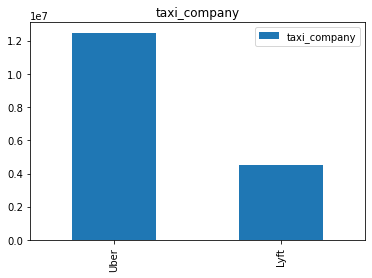

In [40]:
plot_bar(df['taxi_company'].value_counts())

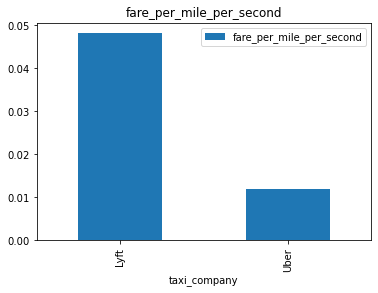

In [41]:
plot_bar(taxi_grp_df['fare_per_mile_per_second'].mean())

### Data Cleaning/Processing - 9
- Extract the hour from the given date time column for Request, Pickup and Dropoff
- This is used to analyse the trips during different times of day

In [42]:
df['request_hour'] = df['request_datetime'].dt.hour
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

### Exploratory Data Analysis (EDA) - 2
- Plotting the number of trips that happened during each hour of the day.
- Time between 16:00 to 23:59 is the busiest of the day with each hour accounting for greater than 5% of the trips.
- Time between 2:00 to 5:59 is the least busy hours with less than 1% of the trips.
- This trend is observed in all the "request", "pickup" and "dropoff" hours
- Taxi companies tend to charge "Surcharge" during busy times or when the supply of drivers is less. So it's important to identify the hour of the day.

In [43]:
df['request_hour'].value_counts(normalize=True)

18    0.058690
17    0.056377
22    0.055772
19    0.055551
21    0.054995
20    0.052570
16    0.051573
23    0.050122
15    0.049752
14    0.048433
8     0.047282
9     0.045285
13    0.044727
12    0.043822
11    0.043298
10    0.042687
7     0.038602
0     0.037971
1     0.027288
6     0.026877
2     0.019852
5     0.017952
3     0.015586
4     0.014937
Name: request_hour, dtype: float64

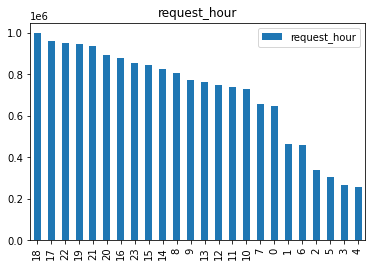

In [44]:
plot_bar(df['request_hour'].value_counts())

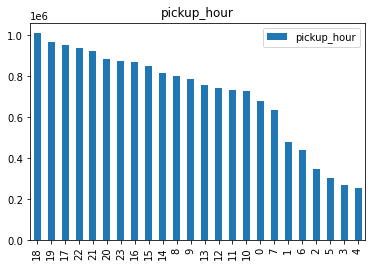

In [45]:
plot_bar(df['pickup_hour'].value_counts())

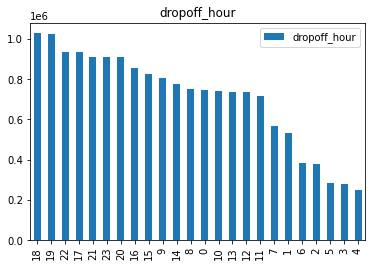

In [46]:
plot_bar(df['dropoff_hour'].value_counts())

### Exploratory Data Analysis (EDA) - 3
- Top 20 Popular Pickup locations/zones. These account for more than 1% of all trips and together more than 20%.
- Similarly, Top 20 Popular Dropoff locations.
- Most of these locations are Airports, Tourist destinations.
- Popular locations tend to have more users requesting for taxi. This can increase the price.

In [47]:
df['PULocation'].value_counts(normalize=True)[:20]

LaGuardia Airport, Queens               0.018295
JFK Airport, Queens                     0.015080
East Village, Manhattan                 0.014320
Times Sq/Theatre District, Manhattan    0.013628
Crown Heights North, Brooklyn           0.013489
East Chelsea, Manhattan                 0.012561
Midtown Center, Manhattan               0.012506
TriBeCa/Civic Center, Manhattan         0.012282
Bushwick South, Brooklyn                0.011677
West Chelsea/Hudson Yards, Manhattan    0.011441
Lower East Side, Manhattan              0.011429
Union Sq, Manhattan                     0.011098
Clinton East, Manhattan                 0.010927
Midtown South, Manhattan                0.010765
East New York, Brooklyn                 0.010574
Williamsburg (North Side), Brooklyn     0.010475
West Village, Manhattan                 0.010193
Astoria, Queens                         0.010111
Murray Hill, Manhattan                  0.010027
Park Slope, Brooklyn                    0.009892
Name: PULocation, dt

In [48]:
sum(df['PULocation'].value_counts(normalize=True)[:20])

0.24076985325665243

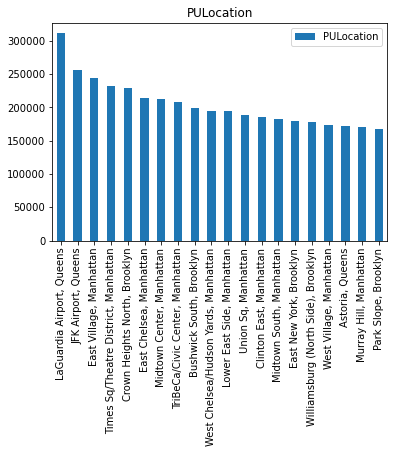

In [49]:
plot_bar(df['PULocation'].value_counts()[:20])

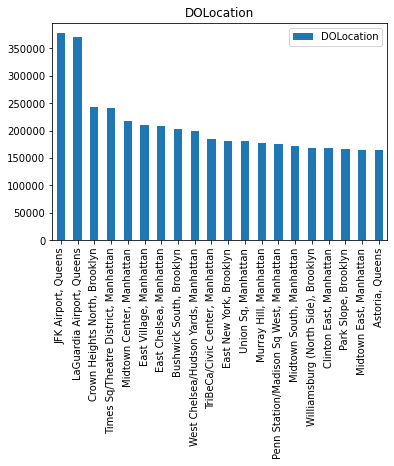

In [50]:
plot_bar(df['DOLocation'].value_counts()[:20])

Graph plotting helper function to display histogram

In [51]:
def plot_hist(df, series, remove_extremes=True):
    max_value = df[series].quantile(0.99)
    if remove_extremes:
        df = df[df[series] < max_value]
        df = df[df[series] > 0]
    df[series].hist(bins=range(int(max_value)), legend=True)

### Exploratory Data Analysis (EDA) - 4
- Plotting the time of each trip as a histogram.
- From the plot, we can see that most of the trips' duration tend to be less than 1000 seconds (15 minutes approximately)
- So the taxi drivers and passengers prefer to have short trips throughout the day.
- This can effect the final fare when a passenger requests for a longer trip (let's say > 30 minutes)
    - Conclusion from the analysis below is, shorter trips tend to be expensive than longer trips
    - Shorter trips are 20 times more expensive than longer trips on average.

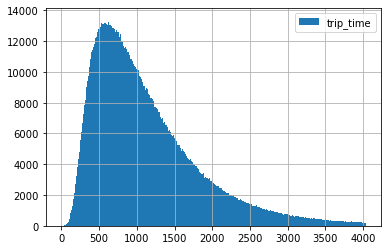

In [52]:
plot_hist(df, 'trip_time')

In [53]:
longer_trip_df = df.copy()[df['trip_time'] > 30*60]
shorter_trip_df = df.copy()[df['trip_time'] < 15*60]

In [54]:
longer_trip_df['fare_per_mile_per_second'].mean()

0.00204712666870961

In [55]:
shorter_trip_df['fare_per_mile_per_second'].mean()

0.041748159149506046

### Exploratory Data Analysis (EDA) - 5
- Plotting the absolute value of "base_passenger_fare" against the number of trips as a histogram
- This tells us that most of the trips have "Base Passenger Fare" as less than \\$10 with peak at \\$5
- Similarly plotting the Tips histogram and Driver Pay histogram reveals these results
    - Most of the tips are in the range of \\$2-\\$5
    - Driver pay for most trips is in the range of \\$8-\\$10

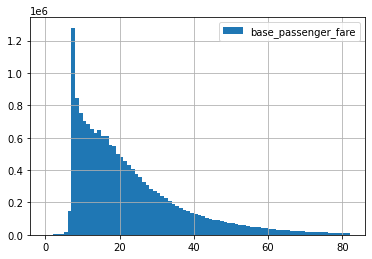

In [56]:
plot_hist(df, 'base_passenger_fare')

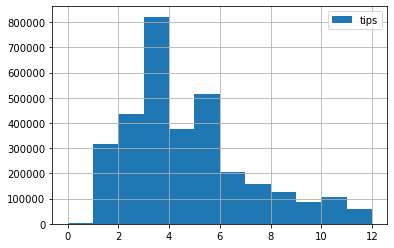

In [57]:
plot_hist(df, 'tips')

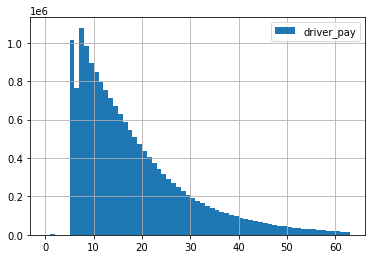

In [58]:
plot_hist(df, 'driver_pay')

### Data Cleaning/Processing - 10
- Create a new column "driver_percent_in_fare" to analyse the driver's pay as a percentage of the "base_passenger_fare"
- This is used later to understand how much of a profit margin Taxi companies are targetting to achieve. This profit margin directly effects the price passengers pay.

### Exploratory Data Analysis (EDA) - 6
- A portion of the base passenger fare goes to the driver and the remaining goes to the taxi company
    - Note that other taxes and fees such as toll, airport fee and taxes are charged to the passenger in addition to the base fare
- Here, we can see how much portion of the fare is paid to the driver
- Analysis show that approximately 80% of the fare is paid to the driver with most trips having 60% to 100% paid to driver

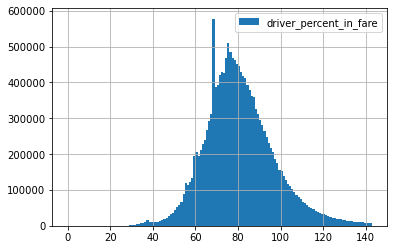

In [59]:
df['driver_percent_in_fare'] = df['driver_pay']/df['base_passenger_fare']*100
plot_hist(df, 'driver_percent_in_fare')

Seaborn plot utility functions for histogram and bar charts (Used for plotting grouped by data)

In [60]:
def plot_sns_grp_hist(grp_df, x, hue):
    ax = sns.histplot(grp_df, x=x, hue=hue, multiple='stack')
    ax.set(xlim=(0, grp_df[x].quantile(0.99)))

In [61]:
def plot_sns_grp_bar(grp_df, x, hue):
    ax = sns.barplot(grp_df, x=x, hue=hue, multiple='stack')
    ax.set(xlim=(0, grp_df[x].quantile(0.99)))

### Exploratory Data Analysis (EDA) - 7
- General analysis on grouped data on which taxi company users tip more, driver pay, passenger fare and user preference according to the company

#### Which users tip more? (Uber or Lyft)
Lyft

In [62]:
taxi_grp_df = df.groupby(['taxi_company'])

In [63]:
taxi_grp_df['tips'].mean()

taxi_company
Lyft    1.142484
Uber    1.032130
Name: tips, dtype: float64

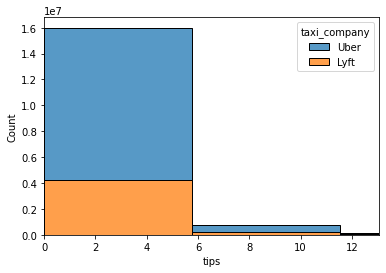

In [64]:
plot_sns_grp_hist(df, 'tips', 'taxi_company')

#### Which drivers earn more? (Uber or Lyft)
Uber

In [65]:
taxi_grp_df['driver_pay'].mean()

taxi_company
Lyft    17.249506
Uber    19.016435
Name: driver_pay, dtype: float64

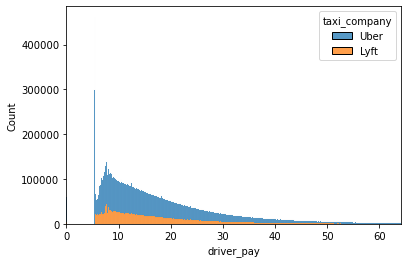

In [66]:
plot_sns_grp_hist(df, 'driver_pay', 'taxi_company')

#### Which is cheaper for passenger?
Lyft

In [67]:
taxi_grp_df['base_passenger_fare'].mean()

taxi_company
Lyft    22.561838
Uber    23.572609
Name: base_passenger_fare, dtype: float64

#### Preference for longer trips
Lyft

In [68]:
taxi_grp_df['trip_miles'].mean()

taxi_company
Lyft    4.677353
Uber    4.579548
Name: trip_miles, dtype: float64

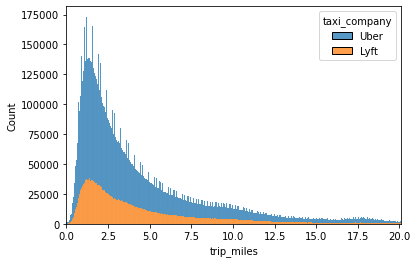

In [69]:
plot_sns_grp_hist(df, 'trip_miles', 'taxi_company')

#### Passenger preference for "Uber vs Lyft" according to different times of day

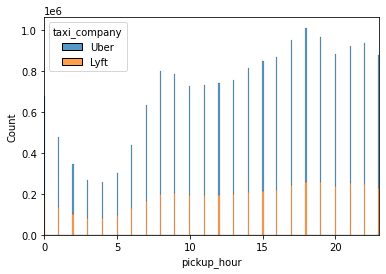

In [70]:
plot_sns_grp_hist(df, 'pickup_hour', 'taxi_company')

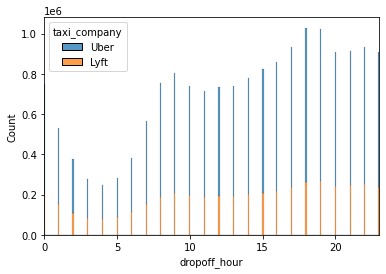

In [71]:
plot_sns_grp_hist(df, 'dropoff_hour', 'taxi_company')

Closely correlated and no specific preference

Utility functions to remove outliers, normalize column data using mean-std.dev or min-max procedures

In [72]:
def remove_outliers(df, column):
    min_value = df[column].quantile(0.01)
    max_value = df[column].quantile(0.99)
    df = df[df[column] < max_value]
    df = df[df[column] > min_value]

In [73]:
def mean_std_norm(df, column):
    meanv = df[column].mean()
    stdv = df[column].std()
    df[column] = (df[column] - meanv)/stdv
    df[column] += 1
    df[column] /= 2

In [74]:
def min_max_norm(df, column):
    minv = df[column].min()
    maxv = df[column].max()
    df[column] = 100*(df[column] - minv)/(maxv - minv)

In [75]:
# Used later
# remove_outliers(df, 'fare_per_mile_per_second')
# min_max_norm(df, 'fare_per_mile_per_second')

### Exploratory Data Analysis (EDA) - 8
- Comparing the fare prices during different times of day
- At 05:00, the fare is highest, probably because of very less drivers during that time.
    - This is confirmed when we plot the number of trips during the 02:00 to 05:00 hours.
- High prices are observed during 02:00 to 05:00
- Lowest fares during 09:00 to 11:00 and 19:00 to 20:00

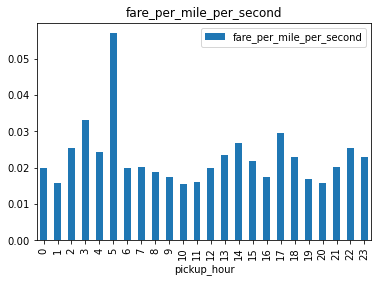

In [76]:
grp_by_pickup_hr = df.groupby(['pickup_hour'])
fms_by_hr = grp_by_pickup_hr['fare_per_mile_per_second'].mean()
plot_bar(fms_by_hr)

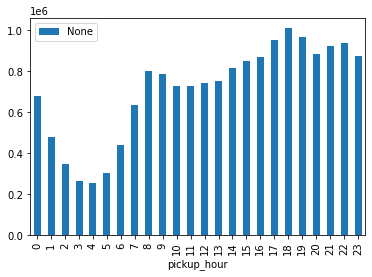

In [77]:
plot_bar(grp_by_pickup_hr.size())

In [78]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay,fare_per_mile_per_second,request_hour,pickup_hour,dropoff_hour,driver_percent_in_fare
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,"Union Sq, Manhattan","Greenwich Village South, Manhattan",1.500,480,7.68,1.00,9.36,0.010667,0,0,0,121.875000
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,"Midtown Center, Manhattan","Manhattan Valley, Manhattan",4.180,835,20.40,4.82,15.61,0.005845,0,0,0,76.519608
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,"TriBeCa/Civic Center, Manhattan","Financial District North, Manhattan",2.910,549,12.29,1.00,8.22,0.007693,0,0,0,66.883645
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,"Financial District North, Manhattan","Stuyvesant Heights, Brooklyn",5.450,1197,24.70,0.00,16.88,0.003786,0,0,1,68.340081
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,"Kips Bay, Manhattan","Midtown East, Manhattan",1.069,234,8.23,0.00,5.47,0.032901,0,0,0,66.464156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,"East Harlem North, Manhattan","Stuy Town/Peter Cooper Village, Manhattan",6.070,816,17.60,2.24,16.23,0.003553,23,23,23,92.215909
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,"Stuy Town/Peter Cooper Village, Manhattan","Battery Park City, Manhattan",4.900,710,17.93,0.00,13.94,0.005154,23,23,23,77.746793
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,"TriBeCa/Civic Center, Manhattan","TriBeCa/Civic Center, Manhattan",0.530,595,11.98,3.00,18.46,0.037990,23,23,0,154.090150
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,"Union Sq, Manhattan","Clinton East, Manhattan",2.850,1184,31.47,1.00,27.27,0.009326,23,23,23,86.653956


### Exploratory Data Analysis (EDA) - 9
- Plot the most and least expensive pickup and dropoff locations
- The ones with higher pricing tend to be of places where the number of trips are very high (10M vs 175K). The demand for taxi is more, hence increased fare. Vice versa for least expensive locations.
- Similar results are observed when analysing dropoff locations

In [79]:
grp_by_pickup_location = df.groupby(['PULocation'])
sorted_pickup_locations = grp_by_pickup_location['fare_per_mile_per_second'].mean().sort_values(ascending=False)

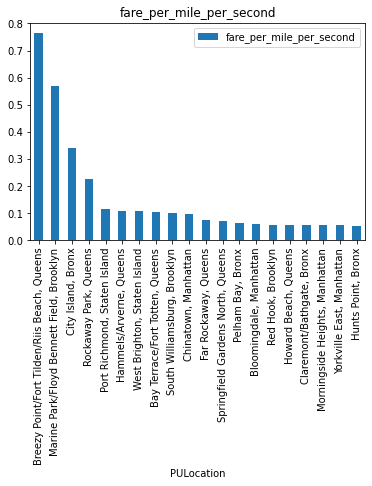

In [80]:
expensive_pickup_locations = sorted_pickup_locations[:20]
plot_bar(expensive_pickup_locations)

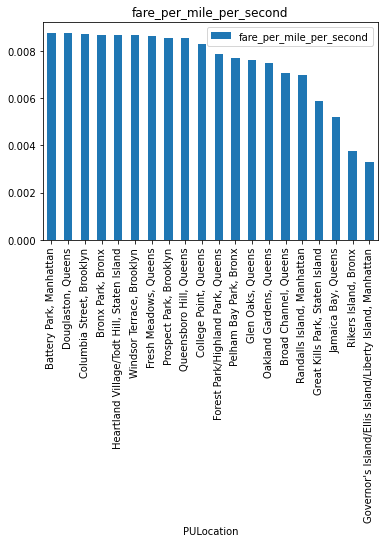

In [81]:
cheap_pickup_locations = sorted_pickup_locations[-20:]
plot_bar(cheap_pickup_locations)

In [82]:
# Expensive pickup locations' mean fare
df.loc[df['PULocation'].isin(sorted_pickup_locations.keys()[:20])]['fare_per_mile_per_second'].mean()

0.07918098264343432

In [83]:
# Inexpensive pickup locations' mean fare
df.loc[df['PULocation'].isin(sorted_pickup_locations.keys()[-20:])]['fare_per_mile_per_second'].mean()

0.00839567837002391

Almost 10x the fare of least expensive locations

In [84]:
# Number of trips in Expensive pickup locations
df.loc[df['PULocation'].isin(sorted_pickup_locations.keys()[:20])].shape[0]

535649

In [85]:
# Number of trips in Inexpensive pickup locations
df.loc[df['PULocation'].isin(sorted_pickup_locations.keys()[-20:])].shape[0]

175107

Close to 5x the number of trips in inexpensive areas

In [86]:
grp_by_dropoff_location = df.groupby(['DOLocation'])
sorted_dropoff_locations = grp_by_dropoff_location['fare_per_mile_per_second'].mean().sort_values(ascending=False)

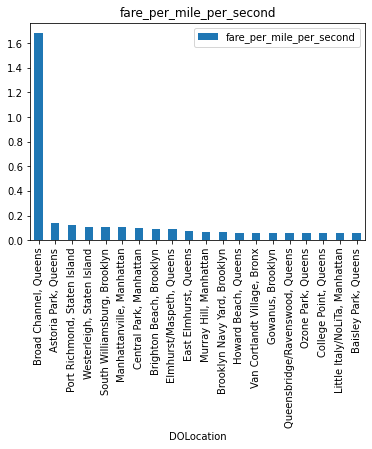

In [87]:
expensive_dropoff_locations = sorted_dropoff_locations[:20]
plot_bar(expensive_dropoff_locations)

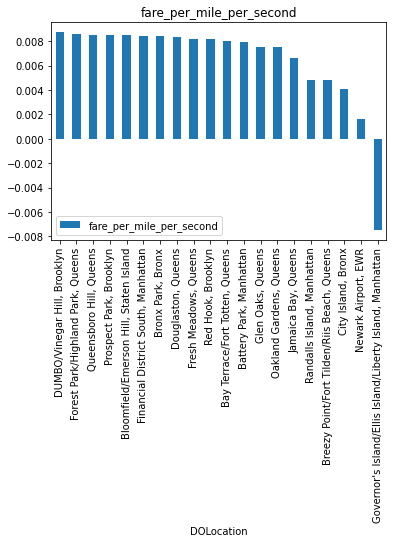

In [88]:
cheap_dropoff_locations = sorted_dropoff_locations[-20:]
plot_bar(cheap_dropoff_locations)

In [89]:
# Expensive dropoff locations' mean fare
df.loc[df['DOLocation'].isin(sorted_dropoff_locations.keys()[:20])]['fare_per_mile_per_second'].mean()

0.0723166739043836

In [90]:
# Inexpensive dropoff locations' mean fare
df.loc[df['DOLocation'].isin(sorted_dropoff_locations.keys()[-20:])]['fare_per_mile_per_second'].mean()

0.006250708746235113

Almost 10x the fare of least expensive locations

In [91]:
# Number of trips in Expensive dropoff locations
df.loc[df['DOLocation'].isin(sorted_dropoff_locations.keys()[:20])].shape[0]

789883

In [92]:
# Number of trips in Inexpensive dropoff locations
df.loc[df['DOLocation'].isin(sorted_dropoff_locations.keys()[-20:])].shape[0]

417824

More than 2x the number of trips in inexpensive areas

### Exploratory Data Analysis (EDA) - 10
- Plot the average fare for popular pickup and dropoff locations
- Most of these locations are Airports, Tourist destinations
- Among these locations, some locations have average fare of \\$0.01 per mile per second whereas some have \\$0.04 per mile per second (almost 4x times the least one)
- Popular dropoff locations also follow similar pattern with fare ranging from 1x-6x

In [93]:
popular_pickup_locations = grp_by_pickup_location.size().sort_values(ascending=False).reset_index()

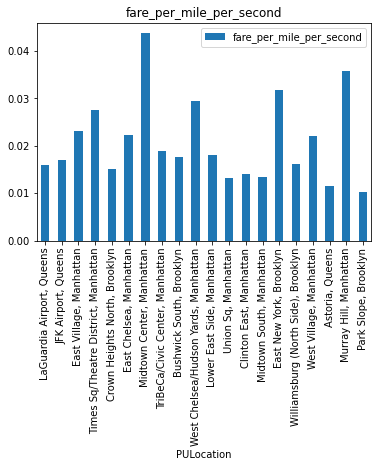

In [94]:
plot_bar(grp_by_pickup_location['fare_per_mile_per_second'].mean()[popular_pickup_locations['PULocation']][:20])

In [95]:
popular_dropoff_locations = grp_by_dropoff_location.size().sort_values(ascending=False).reset_index()

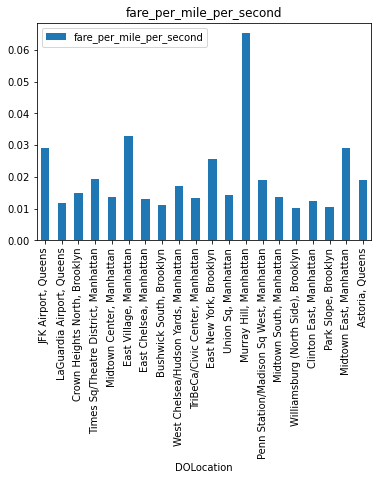

In [96]:
plot_bar(grp_by_dropoff_location['fare_per_mile_per_second'].mean()[popular_dropoff_locations['DOLocation']][:20])

### Data Cleaning/Processing - 11
- In order to understand the true cost of each trip and the driver profits after deducting their gas cost, new columns like "driver_expenditure", "driver_profit" and "taxi_company_profit" are created.
- This is used in later phases to predict the base fare and how little or more the taxi company can charge the passenger and still end up in profit.
- Average mileage and gas price for the month are hyperparameters. We can choose the value according to the car type and gas prices

In [97]:
mpg = 20 # average miles per gallon
pg = 5.56 # NYC gas price in June 2022
df['driver_expenditure'] = (df['trip_miles']/mpg)*pg
df['driver_profit'] = df['driver_pay'] - df['driver_expenditure']
df['taxi_company_profit'] = df['base_passenger_fare'] - df['driver_pay']

### Exploratory Data Analysis (EDA) - 11
- Plotting the "Driver's Profit" after deducting the expenses such as gas
- Plotting "Taxi Companies' Profit" after removing Driver's share from the Base passenger fare
- Driver's mostly get paid \\$5-\\$8 per trip with more pay for longer trips
- Taxi Companies profit is within a range for most trips with the range being \\$1-\\$5 (more pay for longer trips)

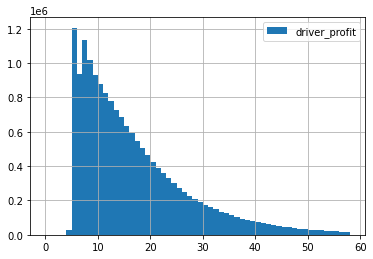

In [98]:
plot_hist(df, 'driver_profit')

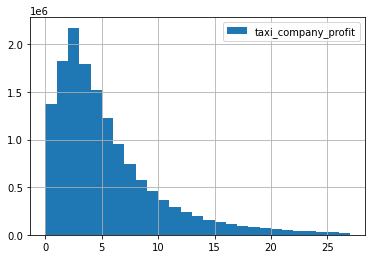

In [99]:
plot_hist(df, 'taxi_company_profit')